Dataset loaded. Number of rows: 667
   id     artists   track name  emotionality emotion_type  emotion_score  \
0   1    Birileri  ...aynı yer      0.334430          JOY       0.951819   
1   2  Cem Karaca      1 Mayıs      0.567888          JOY       0.986729   
2   3    Lvbel C5    10 NUMARA      0.255862        ANGER       0.987172   
3   4        Gece           22      0.399910          JOY       0.465490   
4   5      Ravend  24'e 5 kala      0.280169          JOY       0.483988   

   culture  
0  Turkish  
1  Turkish  
2  Turkish  
3  Turkish  
4  Turkish  

=== Count per culture ===
culture
Turkish    592
Balkan      75
Name: count, dtype: int64

=== Average emotionality per culture ===
culture
Balkan     0.347526
Turkish    0.409455
Name: emotionality, dtype: float64

=== Emotion type frequencies ===

--- Balkan ---
ANGER            Count:  12   (16.0%)
FEAR             Count:   4   (5.3%)
JOY              Count:  36   (48.0%)
LOVE             Count:   8   (10.7%)
SADNESS     

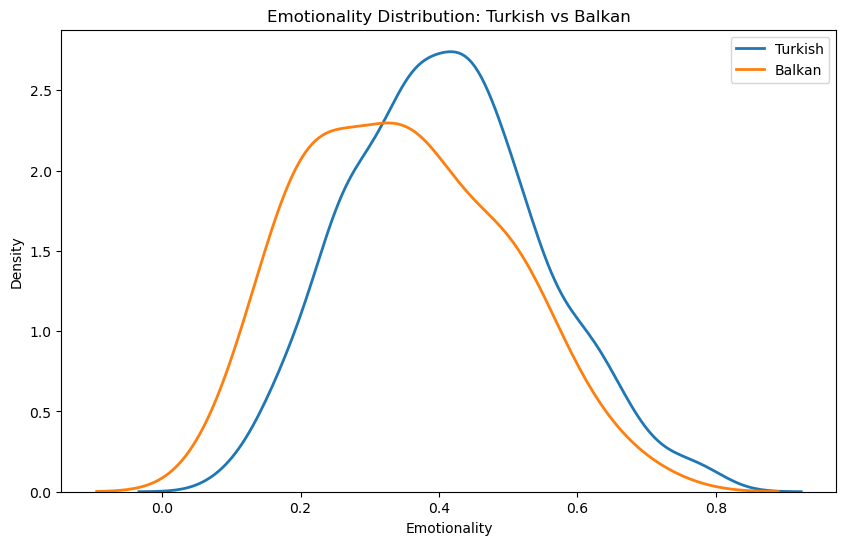

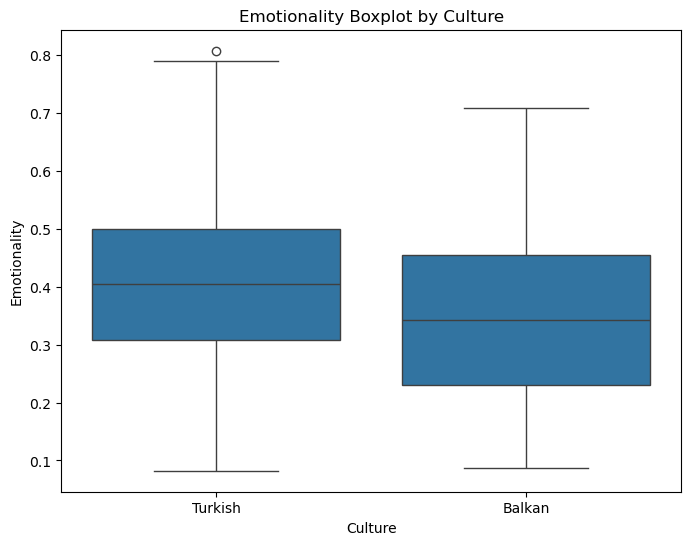

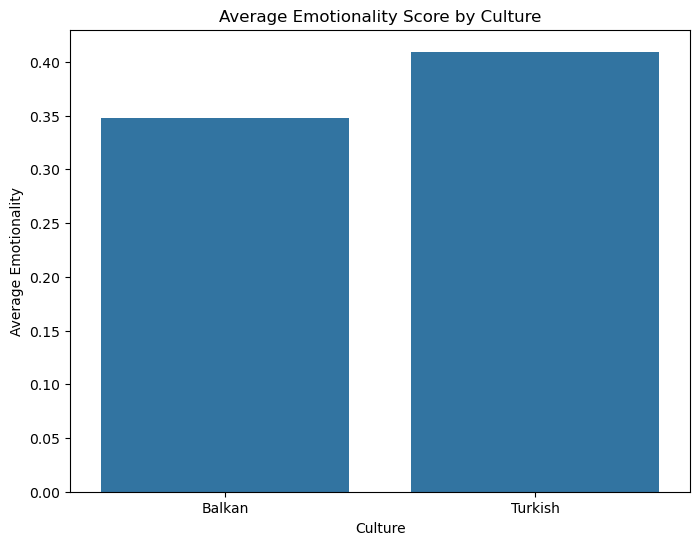

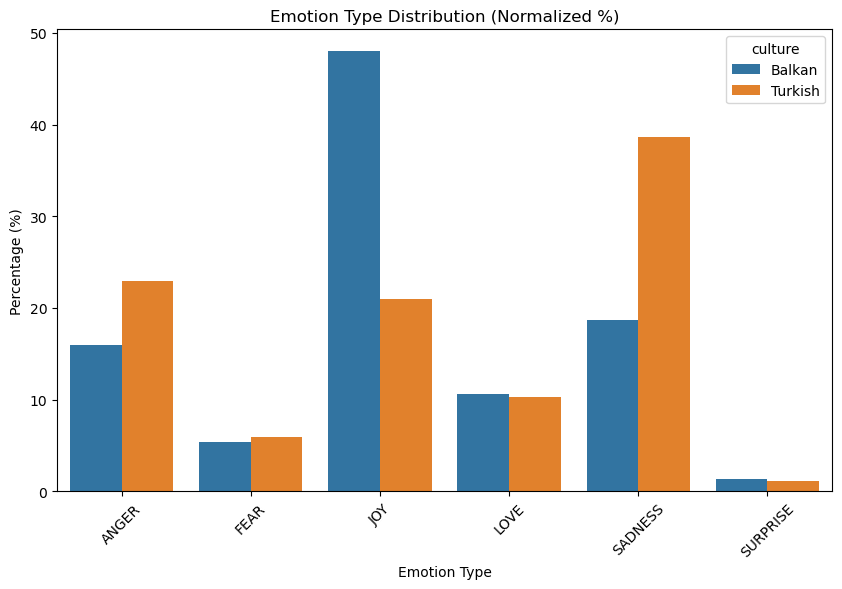

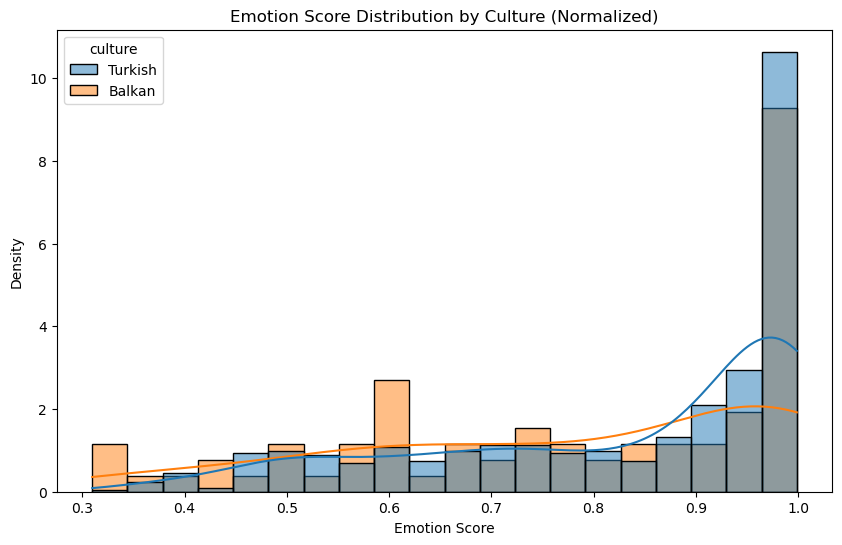

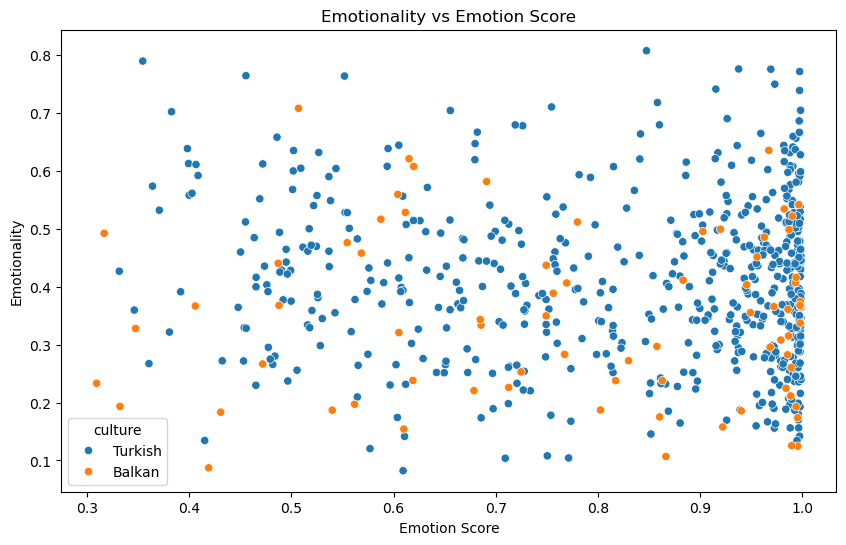


=== Statistical Test: Emotionality Difference ===
t-statistic: 3.5328370198179697
p-value: 0.0006446286308862238
➡️ The emotionality difference is statistically significant.

Analysis complete.


In [11]:
# ===================================================
# Turkish vs. Balkan Song Emotionality Analysis
# ===================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# -------------------------------------------------------------
# 1) LOAD DATASET
# -------------------------------------------------------------

df = pd.read_csv("FINAL_PROJECT_DATASET.csv")

print("Dataset loaded. Number of rows:", len(df))
print(df.head())

# -------------------------------------------------------------
# 2) BASIC STATISTICS
# -------------------------------------------------------------
print("\n=== Count per culture ===")
print(df["culture"].value_counts())

print("\n=== Average emotionality per culture ===")
print(df.groupby("culture")["emotionality"].mean())

emotion_stats = (
    df.groupby(["culture", "emotion_type"])
      .size()
      .reset_index(name="count")
)

emotion_stats["percentage"] = (
    emotion_stats["count"] / emotion_stats.groupby("culture")["count"].transform("sum") * 100
)

print("\n=== Emotion type frequencies ===")
for culture in emotion_stats["culture"].unique():
    print(f"\n--- {culture} ---")
    temp = emotion_stats[emotion_stats["culture"] == culture]
    for _, row in temp.iterrows():
        print(f"{row['emotion_type']:15}  Count: {row['count']:3}   ({row['percentage']:.1f}%)")

# -------------------------------------------------------------
# 3) EMOTIONALITY DISTRIBUTION (KDE PLOTS)
# -------------------------------------------------------------

plt.figure(figsize=(10,6))
sns.kdeplot(df[df["culture"]=="Turkish"]["emotionality"], label="Turkish", linewidth=2)
sns.kdeplot(df[df["culture"]=="Balkan"]["emotionality"], label="Balkan", linewidth=2)
plt.title("Emotionality Distribution: Turkish vs Balkan")
plt.xlabel("Emotionality")
plt.ylabel("Density")
plt.legend()
plt.show()

# -------------------------------------------------------------
# 4) EMOTIONALITY BOXPLOT
# -------------------------------------------------------------

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="culture", y="emotionality")
plt.title("Emotionality Boxplot by Culture")
plt.xlabel("Culture")
plt.ylabel("Emotionality")
plt.show()

# -------------------------------------------------------------
# 5) AVERAGE EMOTIONALITY (BAR CHART)
# -------------------------------------------------------------

avg_emotionality = df.groupby("culture")["emotionality"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=avg_emotionality, x="culture", y="emotionality")
plt.title("Average Emotionality Score by Culture")
plt.ylabel("Average Emotionality")
plt.xlabel("Culture")
plt.show()

# -------------------------------------------------------------
# 6) NORMALIZED EMOTION TYPE DISTRIBUTION (PERCENTAGES)
# -------------------------------------------------------------

# Count emotion types per culture
emotion_counts = df.groupby(["culture", "emotion_type"]).size().reset_index(name="count")

# Normalize counts to percentages within each culture
emotion_counts["percentage"] = (
    emotion_counts["count"] / emotion_counts.groupby("culture")["count"].transform("sum") * 100
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=emotion_counts,
    x="emotion_type",
    y="percentage",
    hue="culture"
)

plt.title("Emotion Type Distribution (Normalized %)")
plt.xlabel("Emotion Type")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

# -------------------------------------------------------------
# 7) EMOTION SCORE DISTRIBUTION (HISTOGRAM)
# -------------------------------------------------------------

plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x="emotion_score",
    hue="culture",
    kde=True,
    stat="density",     # <--- IMPORTANT: normalize
    common_norm=False,  # each culture normalized separately
    bins=20
)

plt.title("Emotion Score Distribution by Culture (Normalized)")
plt.xlabel("Emotion Score")
plt.ylabel("Density")
plt.show()

# -------------------------------------------------------------
# 8) SCATTER PLOT (EMOTIONALITY VS EMOTION SCORE)
# -------------------------------------------------------------

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="emotion_score", y="emotionality", hue="culture")
plt.title("Emotionality vs Emotion Score")
plt.xlabel("Emotion Score")
plt.ylabel("Emotionality")
plt.show()

# -------------------------------------------------------------
# 9) STATISTICAL SIGNIFICANCE TEST (T-TEST)
# -------------------------------------------------------------

turkish_vals = df[df["culture"]=="Turkish"]["emotionality"]
balkan_vals  = df[df["culture"]=="Balkan"]["emotionality"]

t_stat, p_val = ttest_ind(turkish_vals, balkan_vals, equal_var=False)

print("\n=== Statistical Test: Emotionality Difference ===")
print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("➡️ The emotionality difference is statistically significant.")
else:
    print("➡️ No statistically significant difference found.")

# -------------------------------------------------------------
# END OF ANALYSIS
# -------------------------------------------------------------

print("\nAnalysis complete.")
